<h1><b><u> Michelson Interferometer data from a classical source 

<h5>We measured the visibility of interference fringes as a function of the relative angle between the mirrors in a Michelson interferometer illuminated by a classical (thermal or broadband) light source. The visibility quantifies the contrast between bright and dark fringes and is defined as


\begin{align*}
    V = \dfrac{I_\mathrm{max} - I_\mathrm{min}}{I_\mathrm{max} + I_\mathrm{min}}
\end{align*}
Experimentally, the visibility was extracted from the recorded intensity oscillations for different mirror angles, with associated statistical uncertainties derived from repeated measurements.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
import sys
from scipy.optimize import curve_fit
sys.path.append('../scripts')

from classical_eraser_analysis import VisibilityCalculation
from plotting import f
f()

<h2><u><b> Data with a quarter wave plate (no eraser)

<h5> When a quarter-wave plate was introduced into one arm of the Michelson interferometer, it converted the linearly polarized light into circularly polarized light. As a result, the two beams returning from the interferometer became orthogonally polarized and could no longer interfere coherently.

<h5>
The measured visibility dropped significantly across all mirror angles, indicating the loss of interference due to polarization mismatch. This confirms that interference requires not only spatial and temporal coherence but also identical polarization states between the interfering beams.

<h3><b><u> Running the data through the analysis pipeline

In [2]:
angles = [0, 8, 16, 24, 32, 40, 45, 48, 56, 64, 72, 80, 90]
visibilities = []
std_visibilities = []
max_intensities = []
min_intensities = []
std_max_intensities = []
std_min_intensities = []
for angle in [0, 8, 16, 24, 32, 40, 45, 48, 56, 64, 72, 80, 90]:
    vis = VisibilityCalculation(f'../data/classical no eraser/{angle}degrees.csv', distance = 43, prominence=0.2e-5)
    #vis.run_diagnostic_plot()
    visibilities.append(vis.get_visibility()[0])
    std_visibilities.append(vis.get_visibility()[1])
    max_intensities.append(np.mean(vis.maxs))
    min_intensities.append(np.mean(vis.mins))
    std_max_intensities.append(np.std(vis.maxs))
    std_min_intensities.append(np.std(vis.mins))
    #print(f'Angle: {angle}, Visibility: {vis.get_visibility()}')

<h5> Plotting the analyzed data to check for correct analysis

Text(0.5, 1.0, 'Visibility vs Angle without Quantum Eraser')

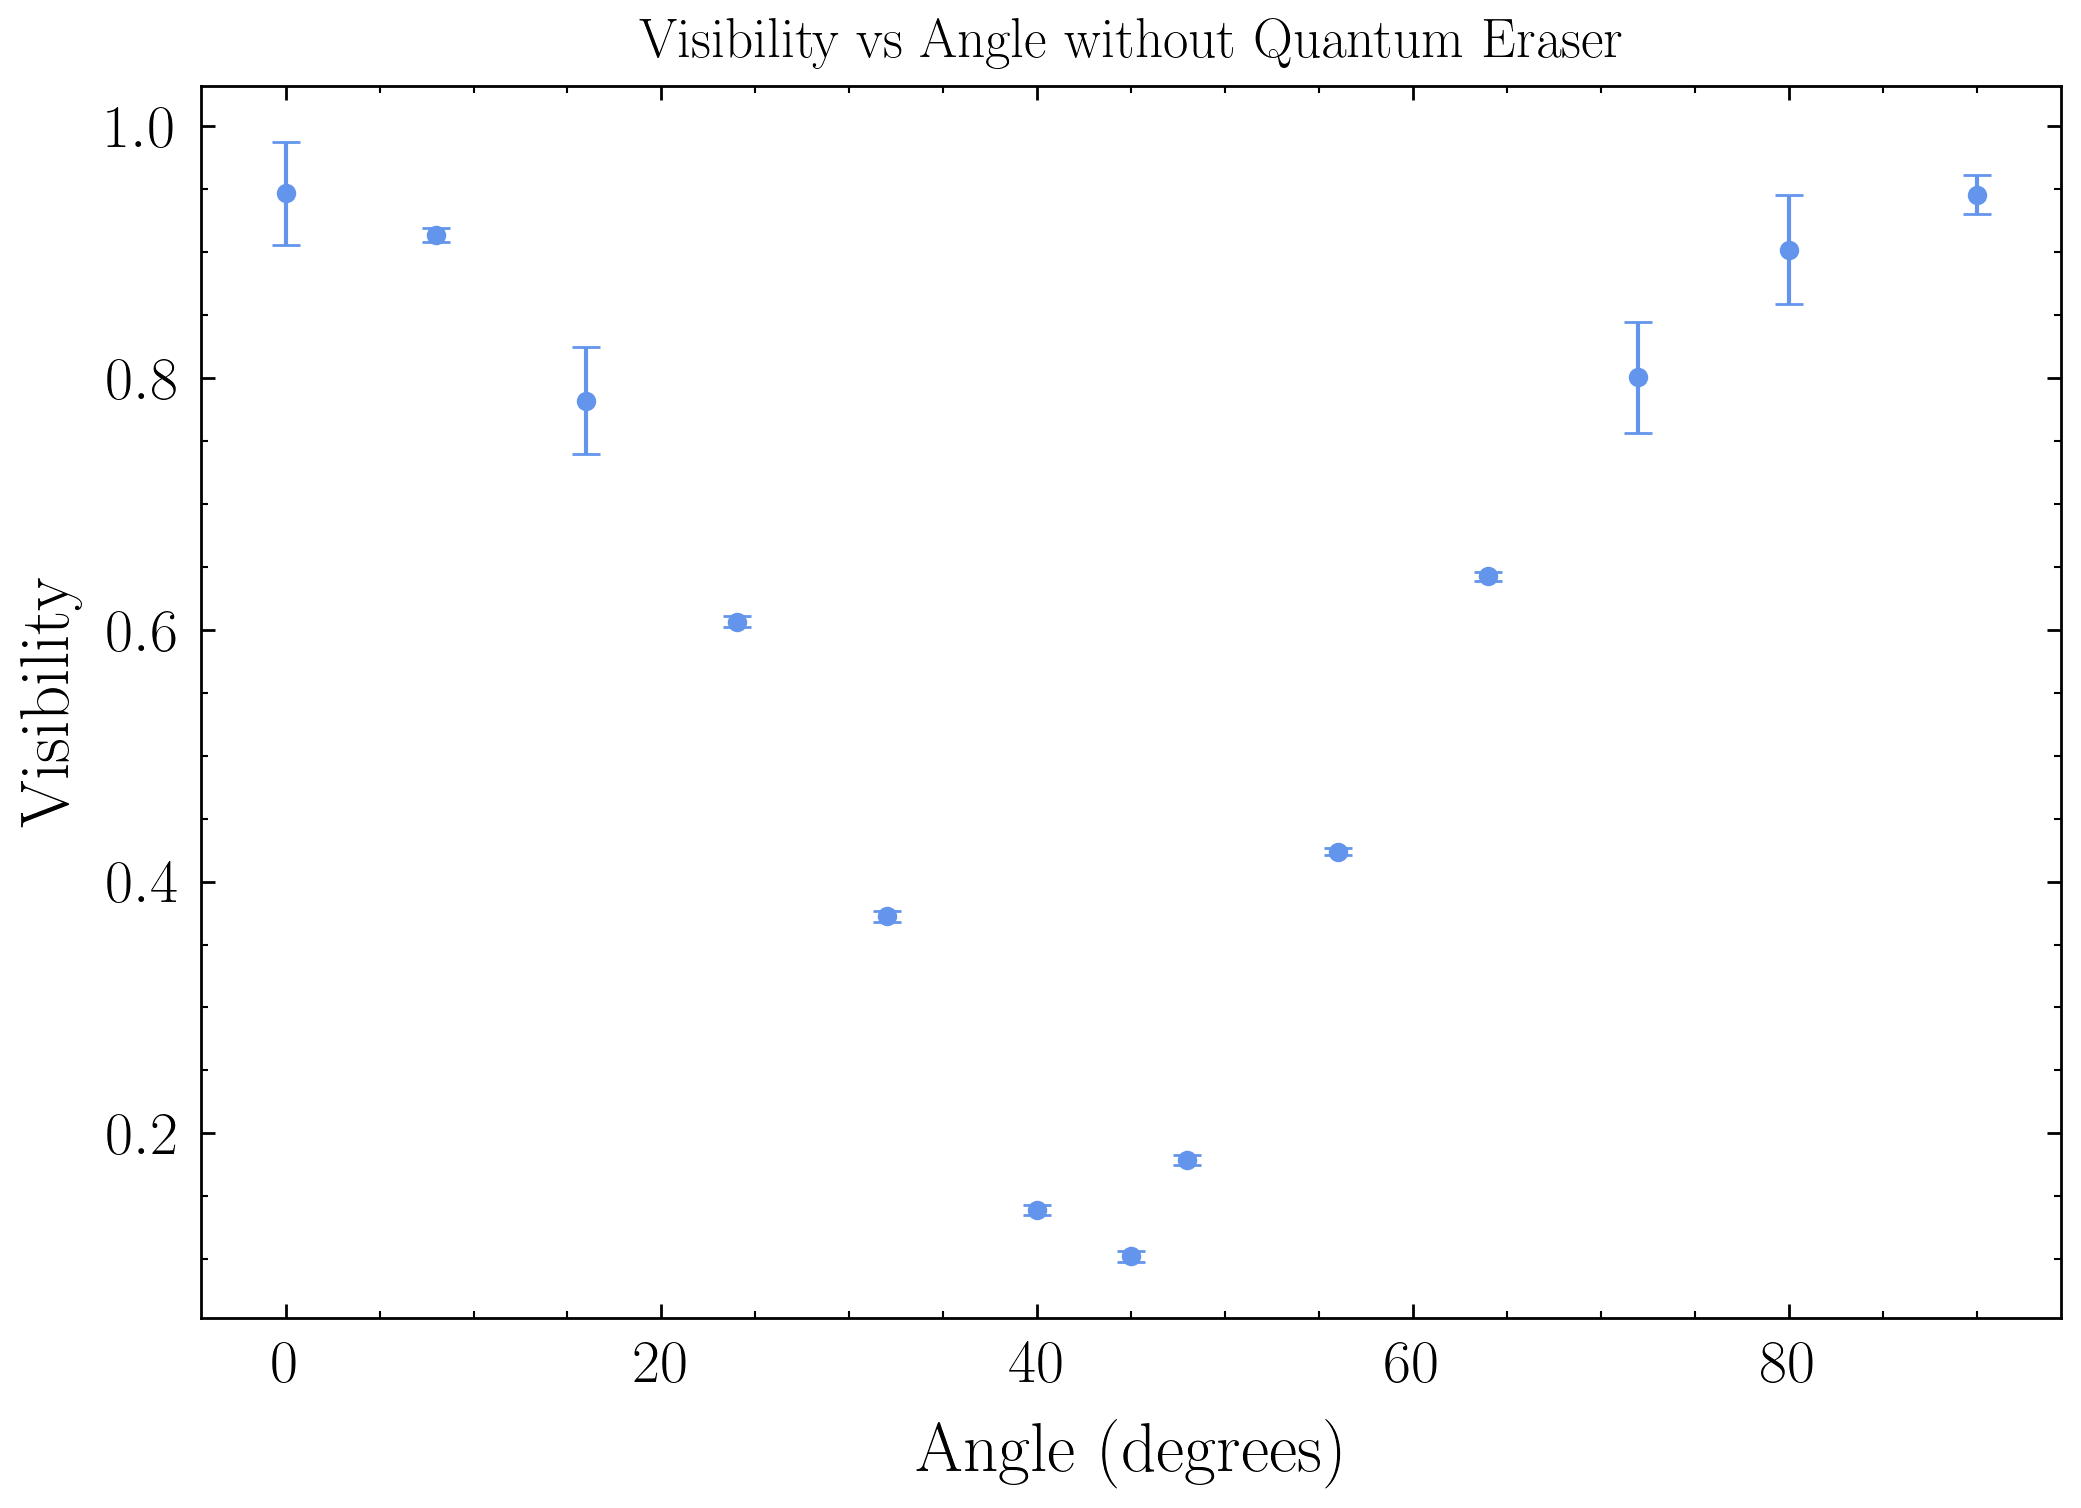

In [3]:
plt.errorbar(angles, visibilities, yerr=std_visibilities, fmt='o', capsize=5)
plt.xlabel('Angle (degrees)')
plt.ylabel('Visibility')
plt.title('Visibility vs Angle without Quantum Eraser', fontsize = 20)

<h5> Clearly, the errorbars are too large for some of the data points reanalyzing those data points

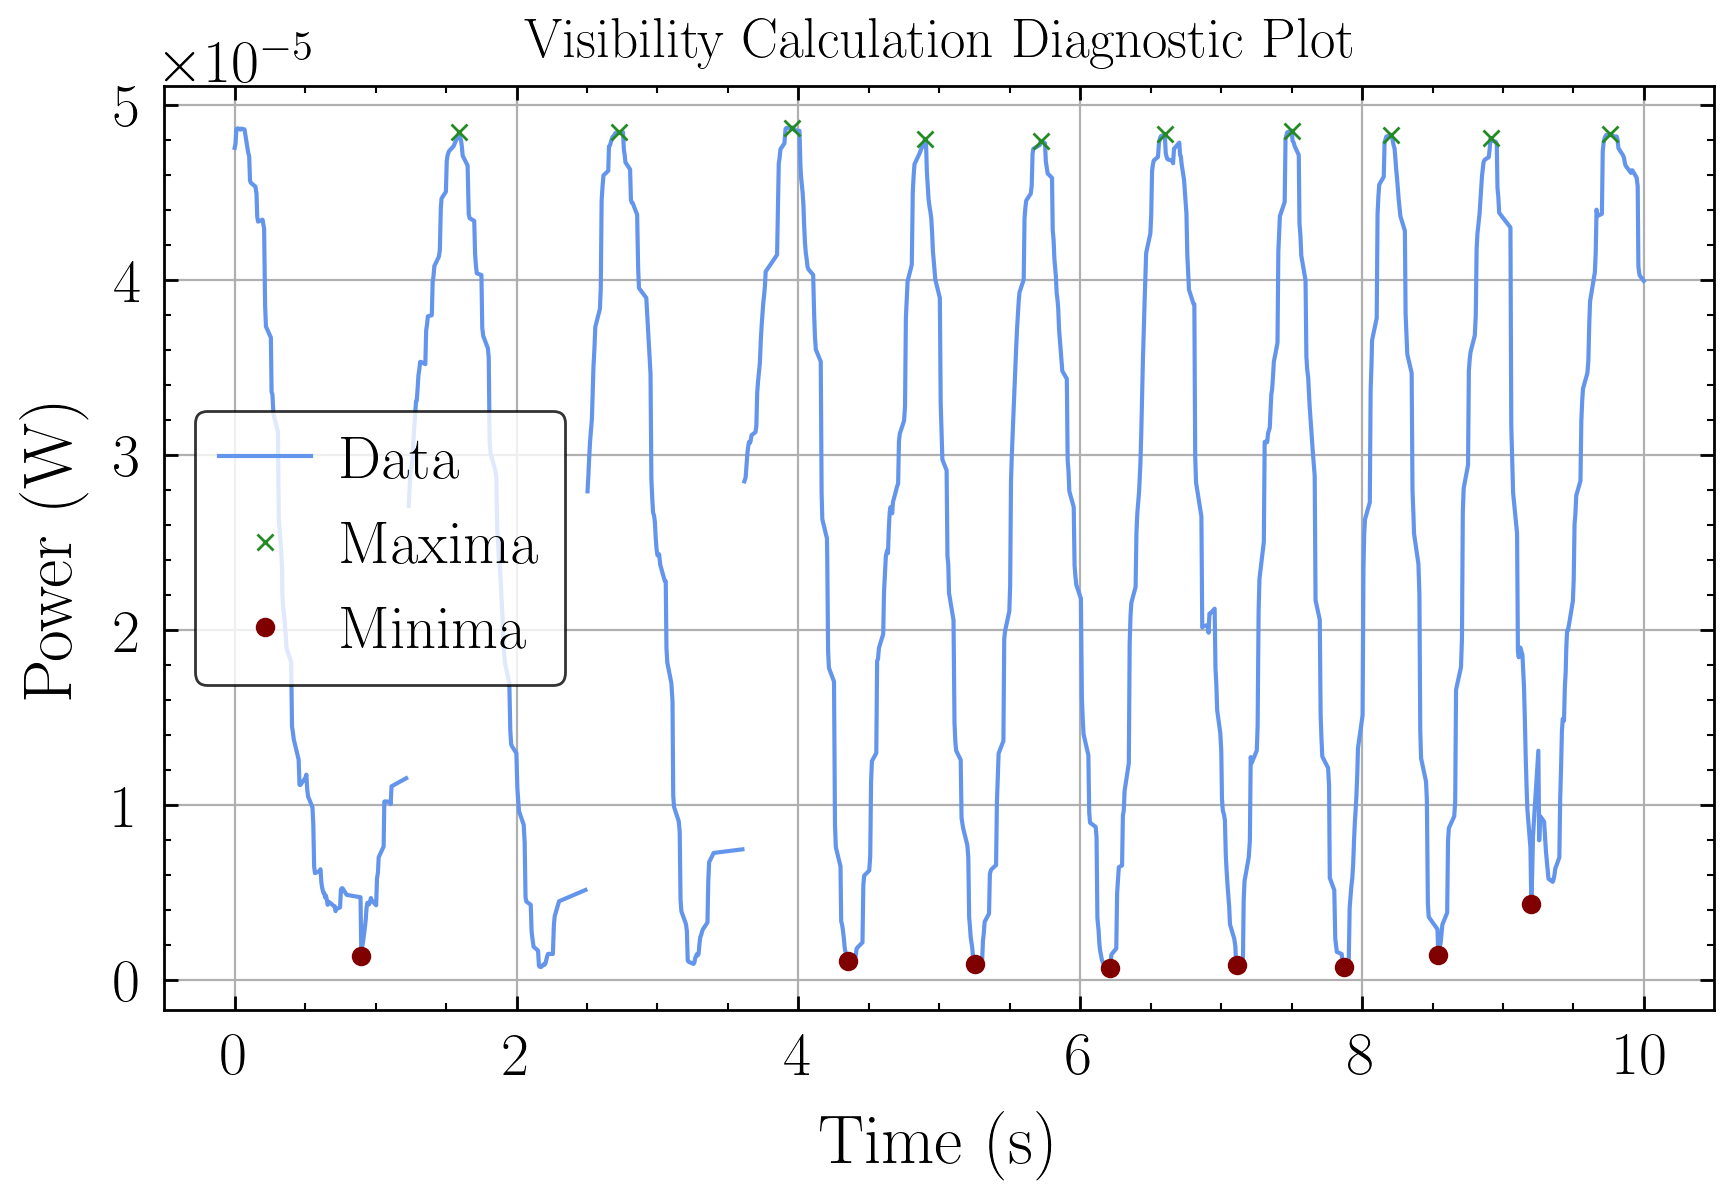

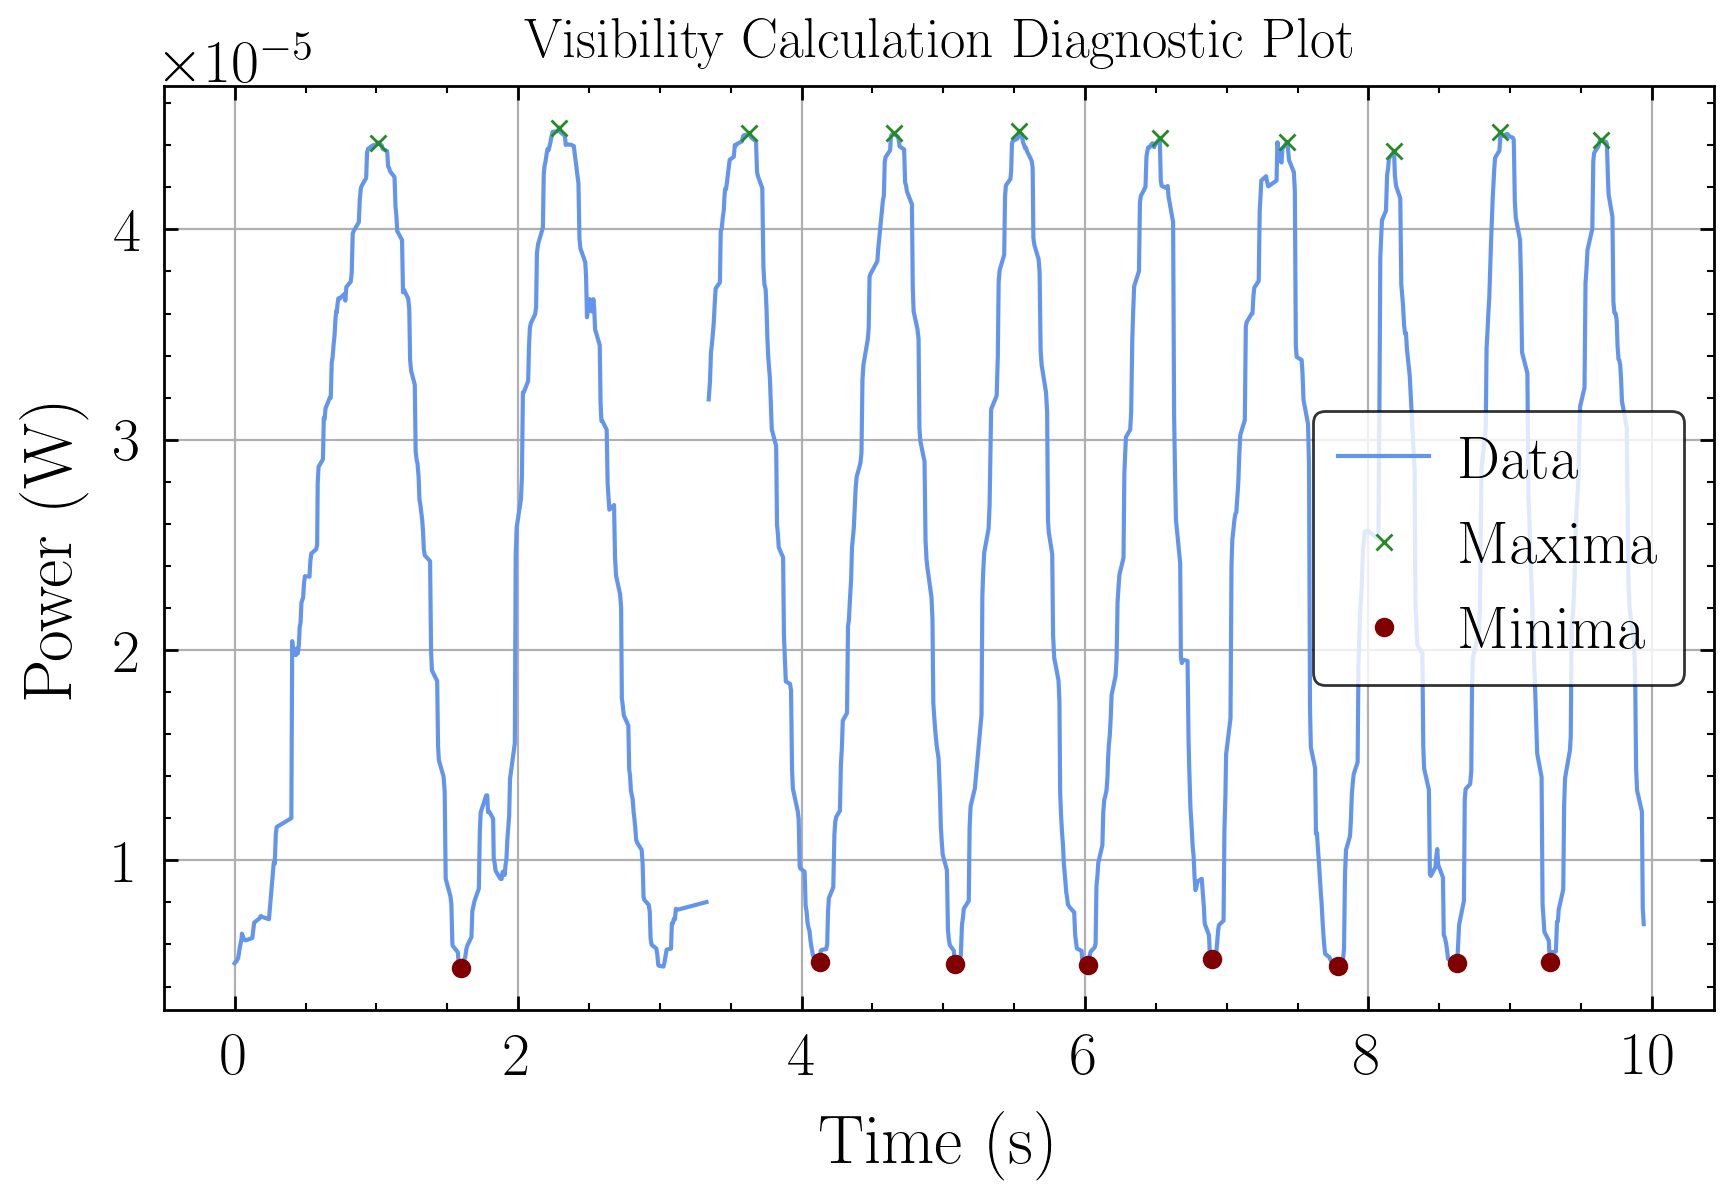

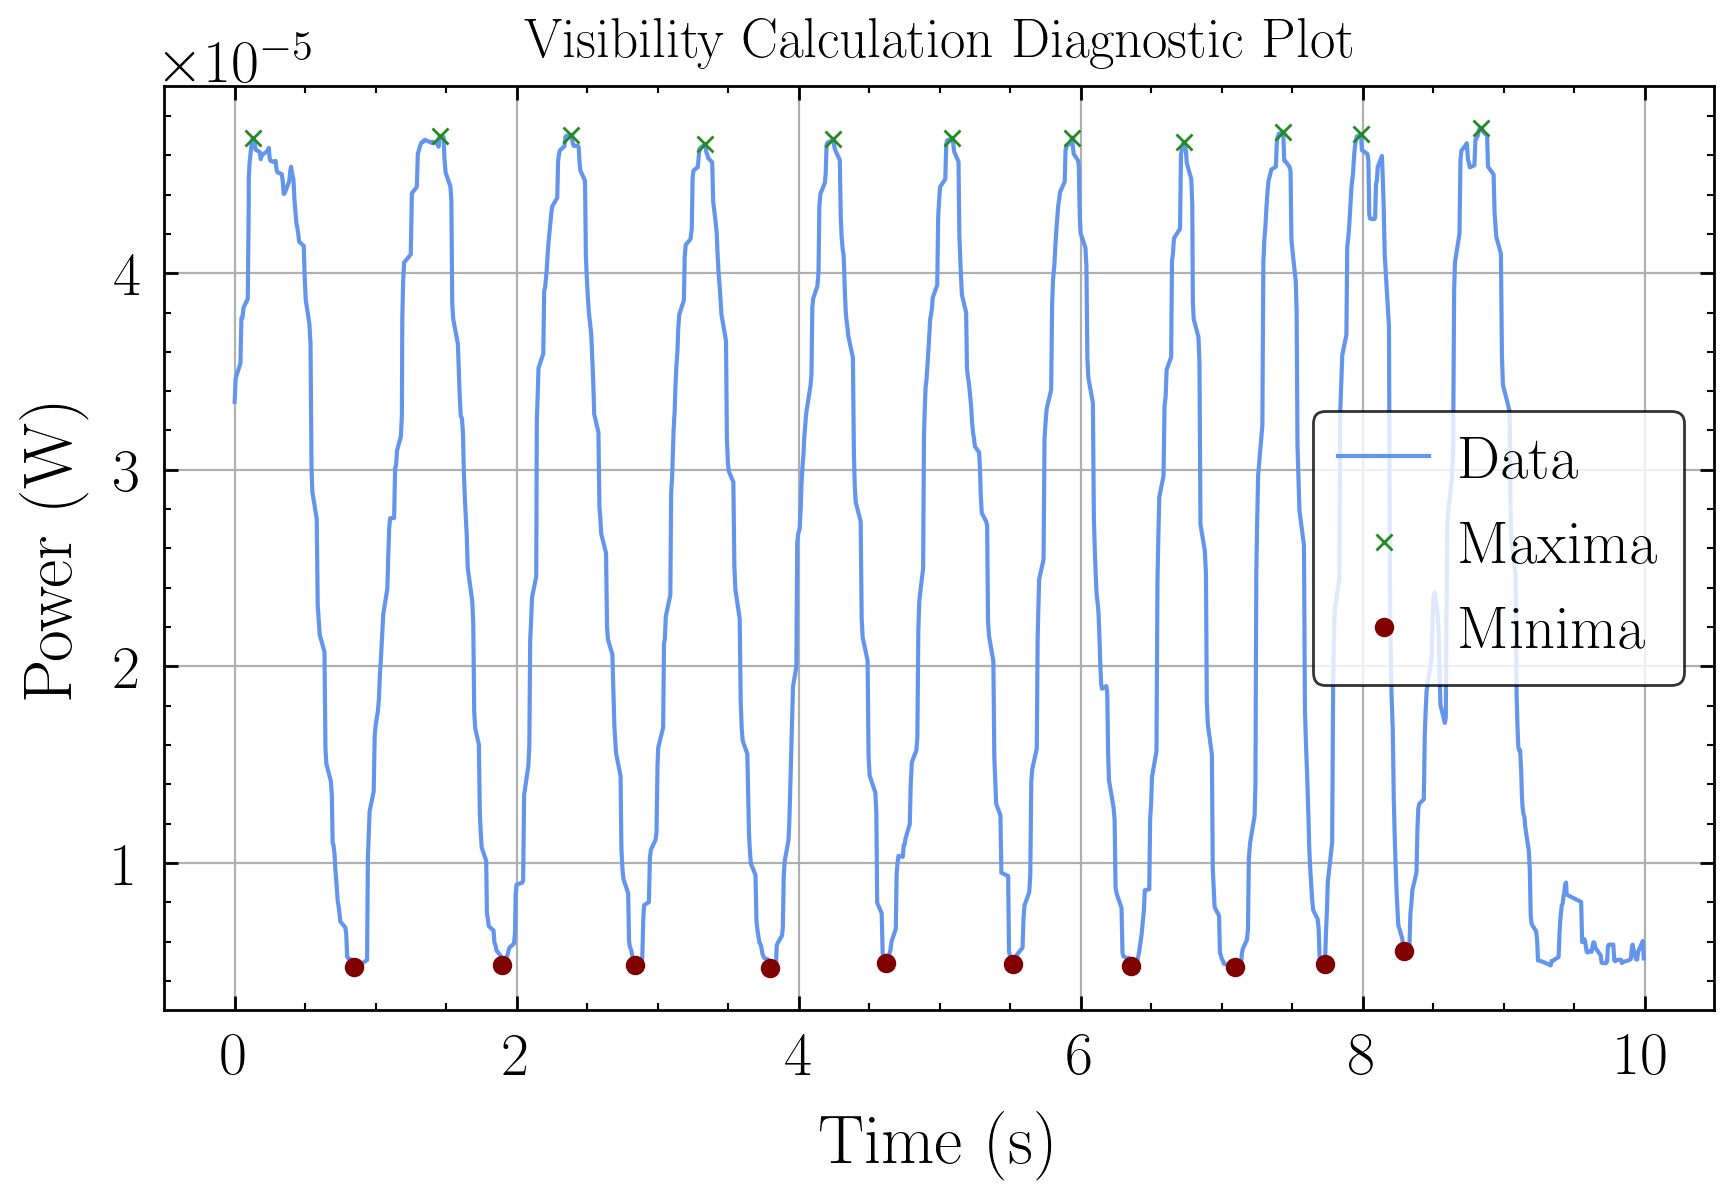

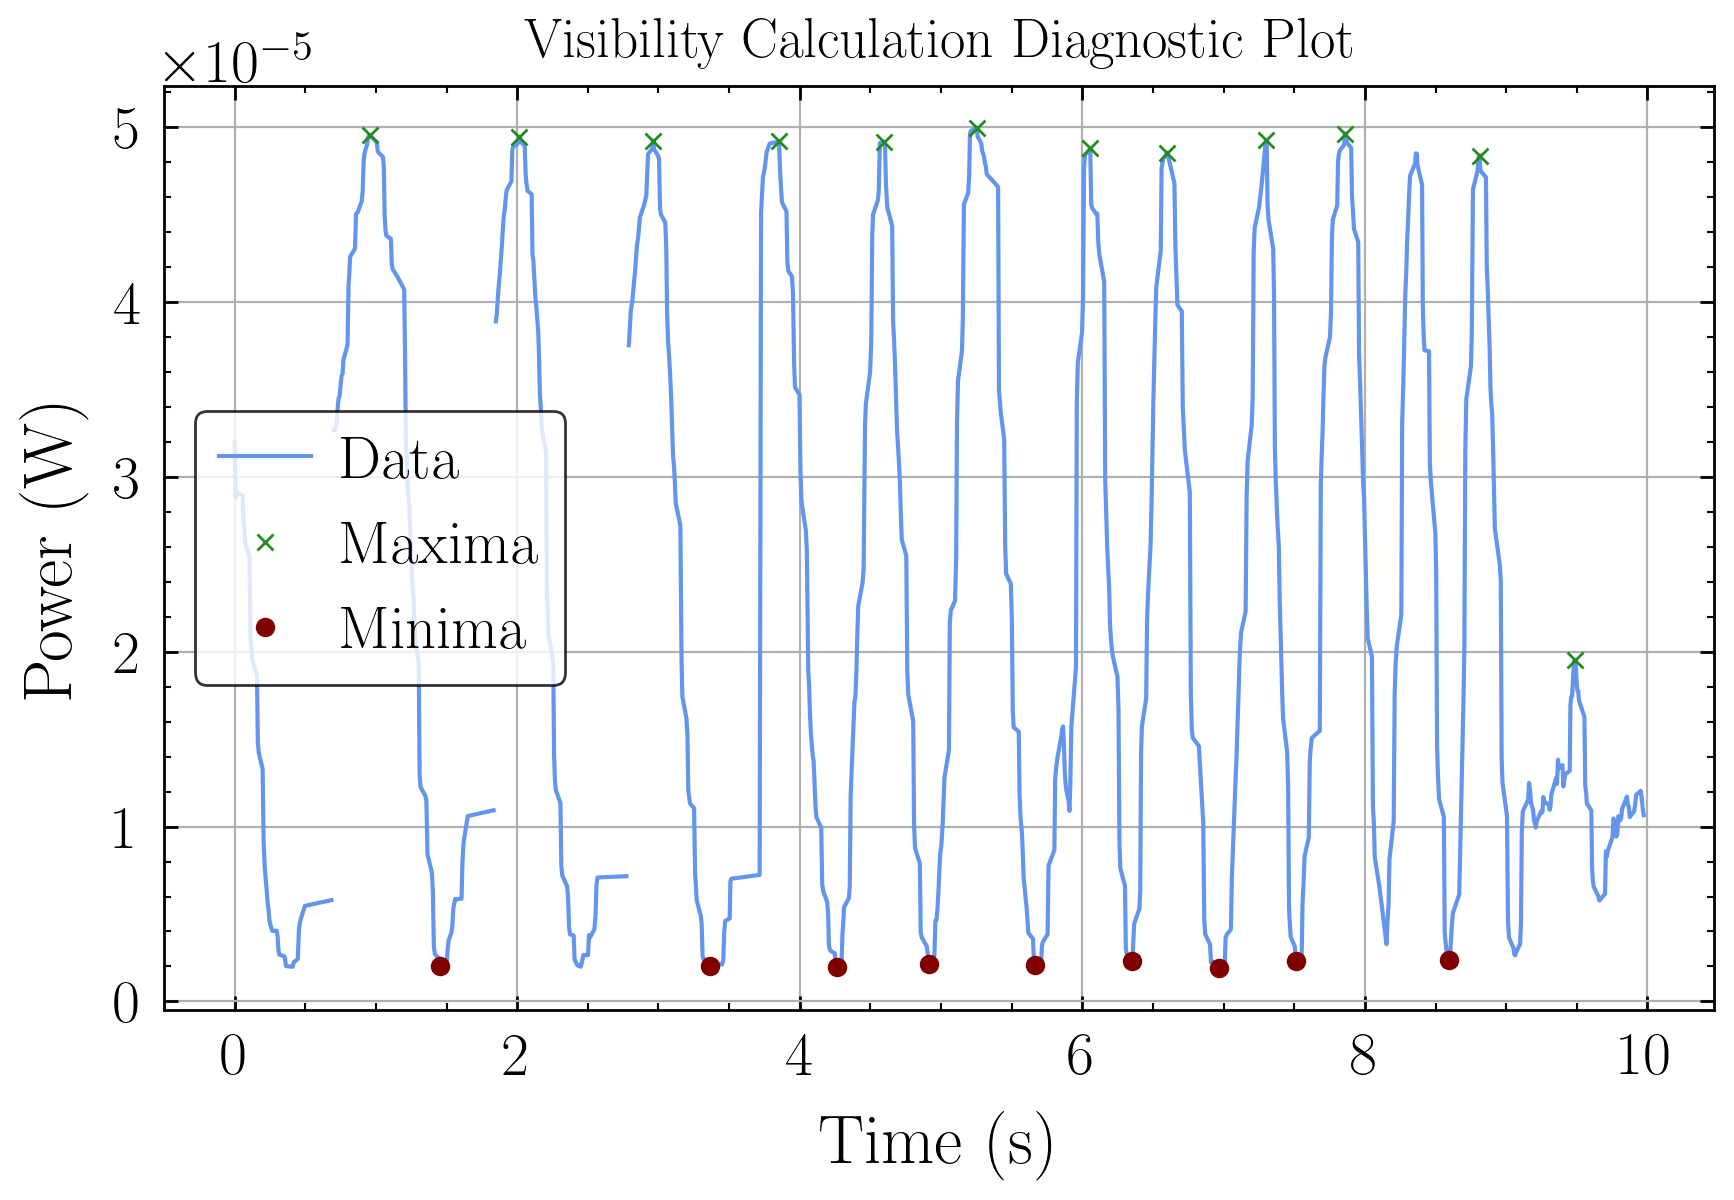

In [4]:
angles_reanalyzed = [0, 16, 72, 80]
for angle in angles_reanalyzed:
    vis = VisibilityCalculation(f'../data/classical no eraser/{angle}degrees.csv', distance = 44, prominence=0.75e-5)
    vis.run_diagnostic_plot()
    # replace the previous value
    visibilities[angles.index(angle)] = vis.get_visibility()[0]
    std_visibilities[angles.index(angle)] = vis.get_visibility()[1]
    max_intensities[angles.index(angle)] = np.mean(vis.maxs)
    min_intensities[angles.index(angle)] = np.mean(vis.mins)
    std_max_intensities[angles.index(angle)] = np.std(vis.maxs)
    std_min_intensities[angles.index(angle)] = np.std(vis.mins)
    

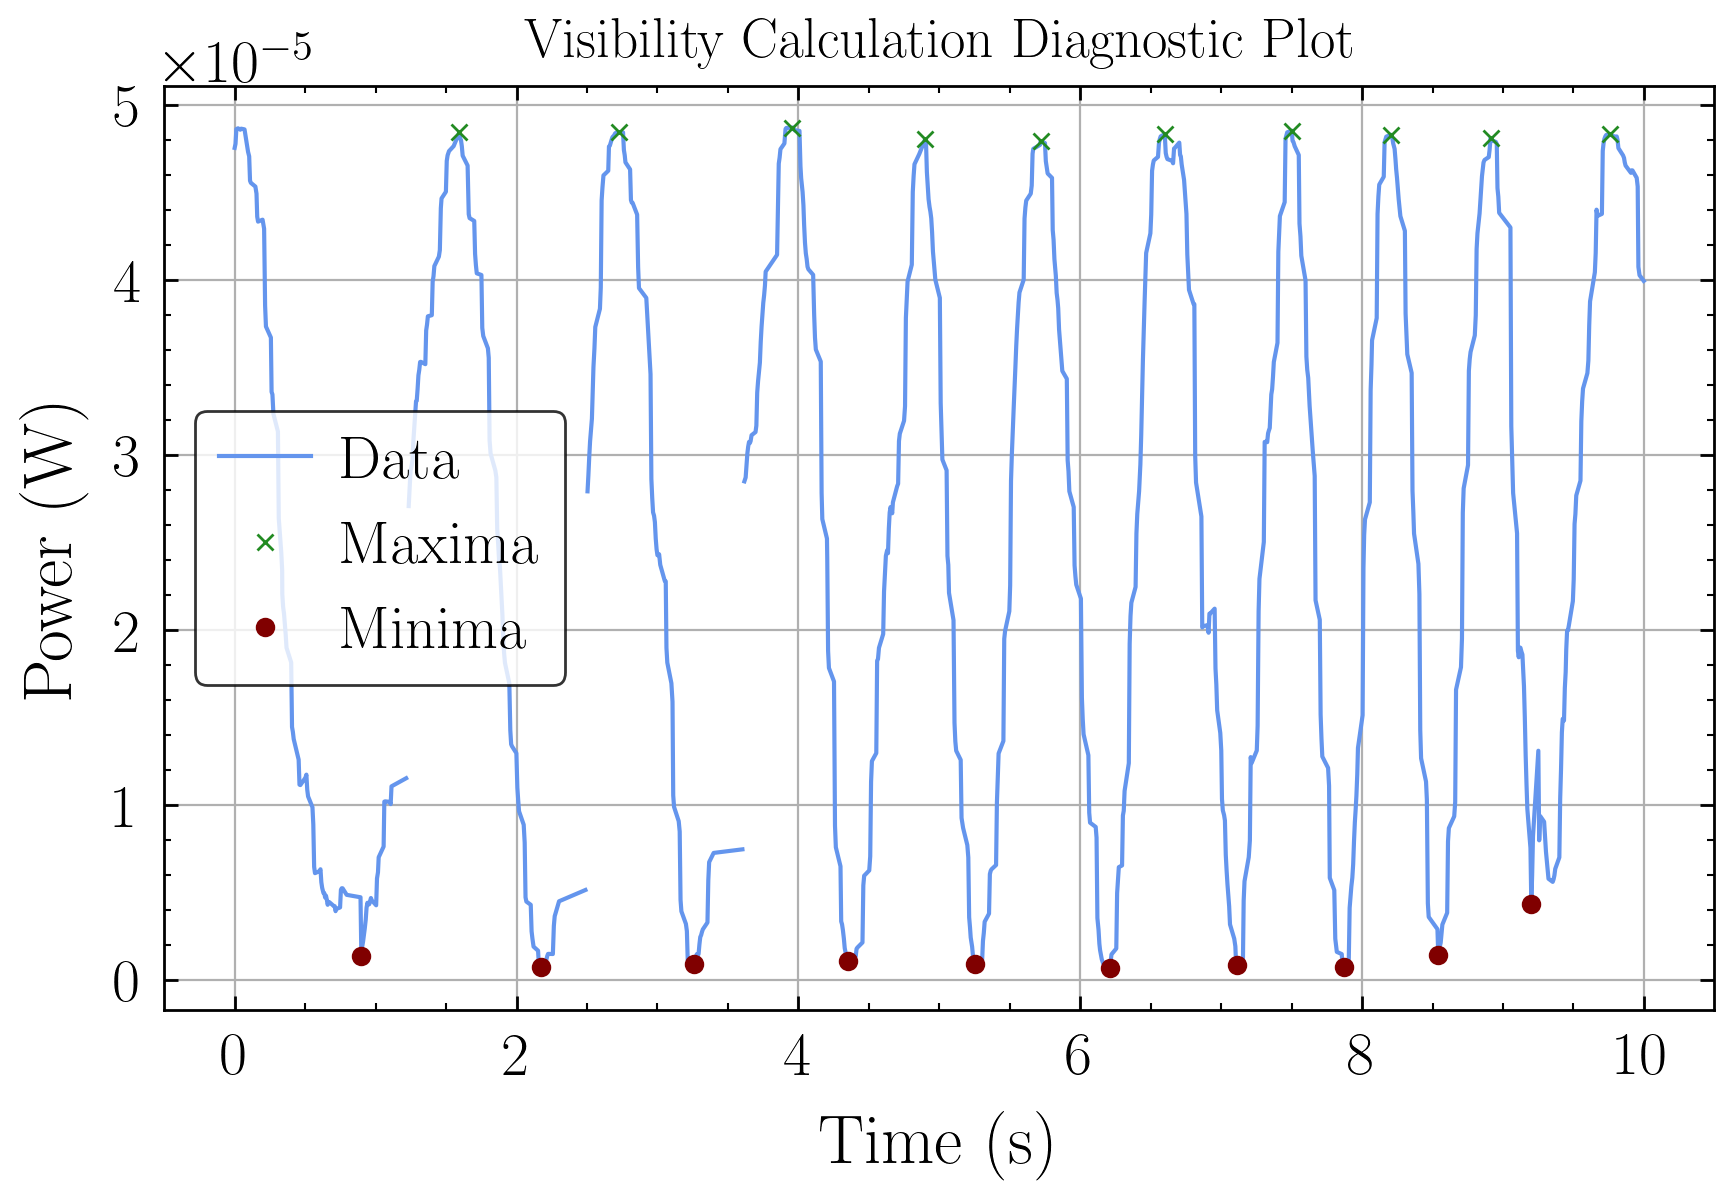

In [5]:
# reanalyze 0 degrees
angle = 0
vis = VisibilityCalculation(f'../data/classical no eraser/{angle}degrees.csv', distance = 45, prominence=0.2e-5)
vis.run_diagnostic_plot()
visibilities[angles.index(angle)] = vis.get_visibility()[0]
std_visibilities[angles.index(angle)] = vis.get_visibility()[1]
max_intensities[angles.index(angle)] = np.mean(vis.maxs)
min_intensities[angles.index(angle)] = np.mean(vis.mins)
std_max_intensities[angles.index(angle)] = np.std(vis.maxs)
std_min_intensities[angles.index(angle)] = np.std(vis.mins)


<h3> <b><u> Plotting the reanalyzed data with the required fit

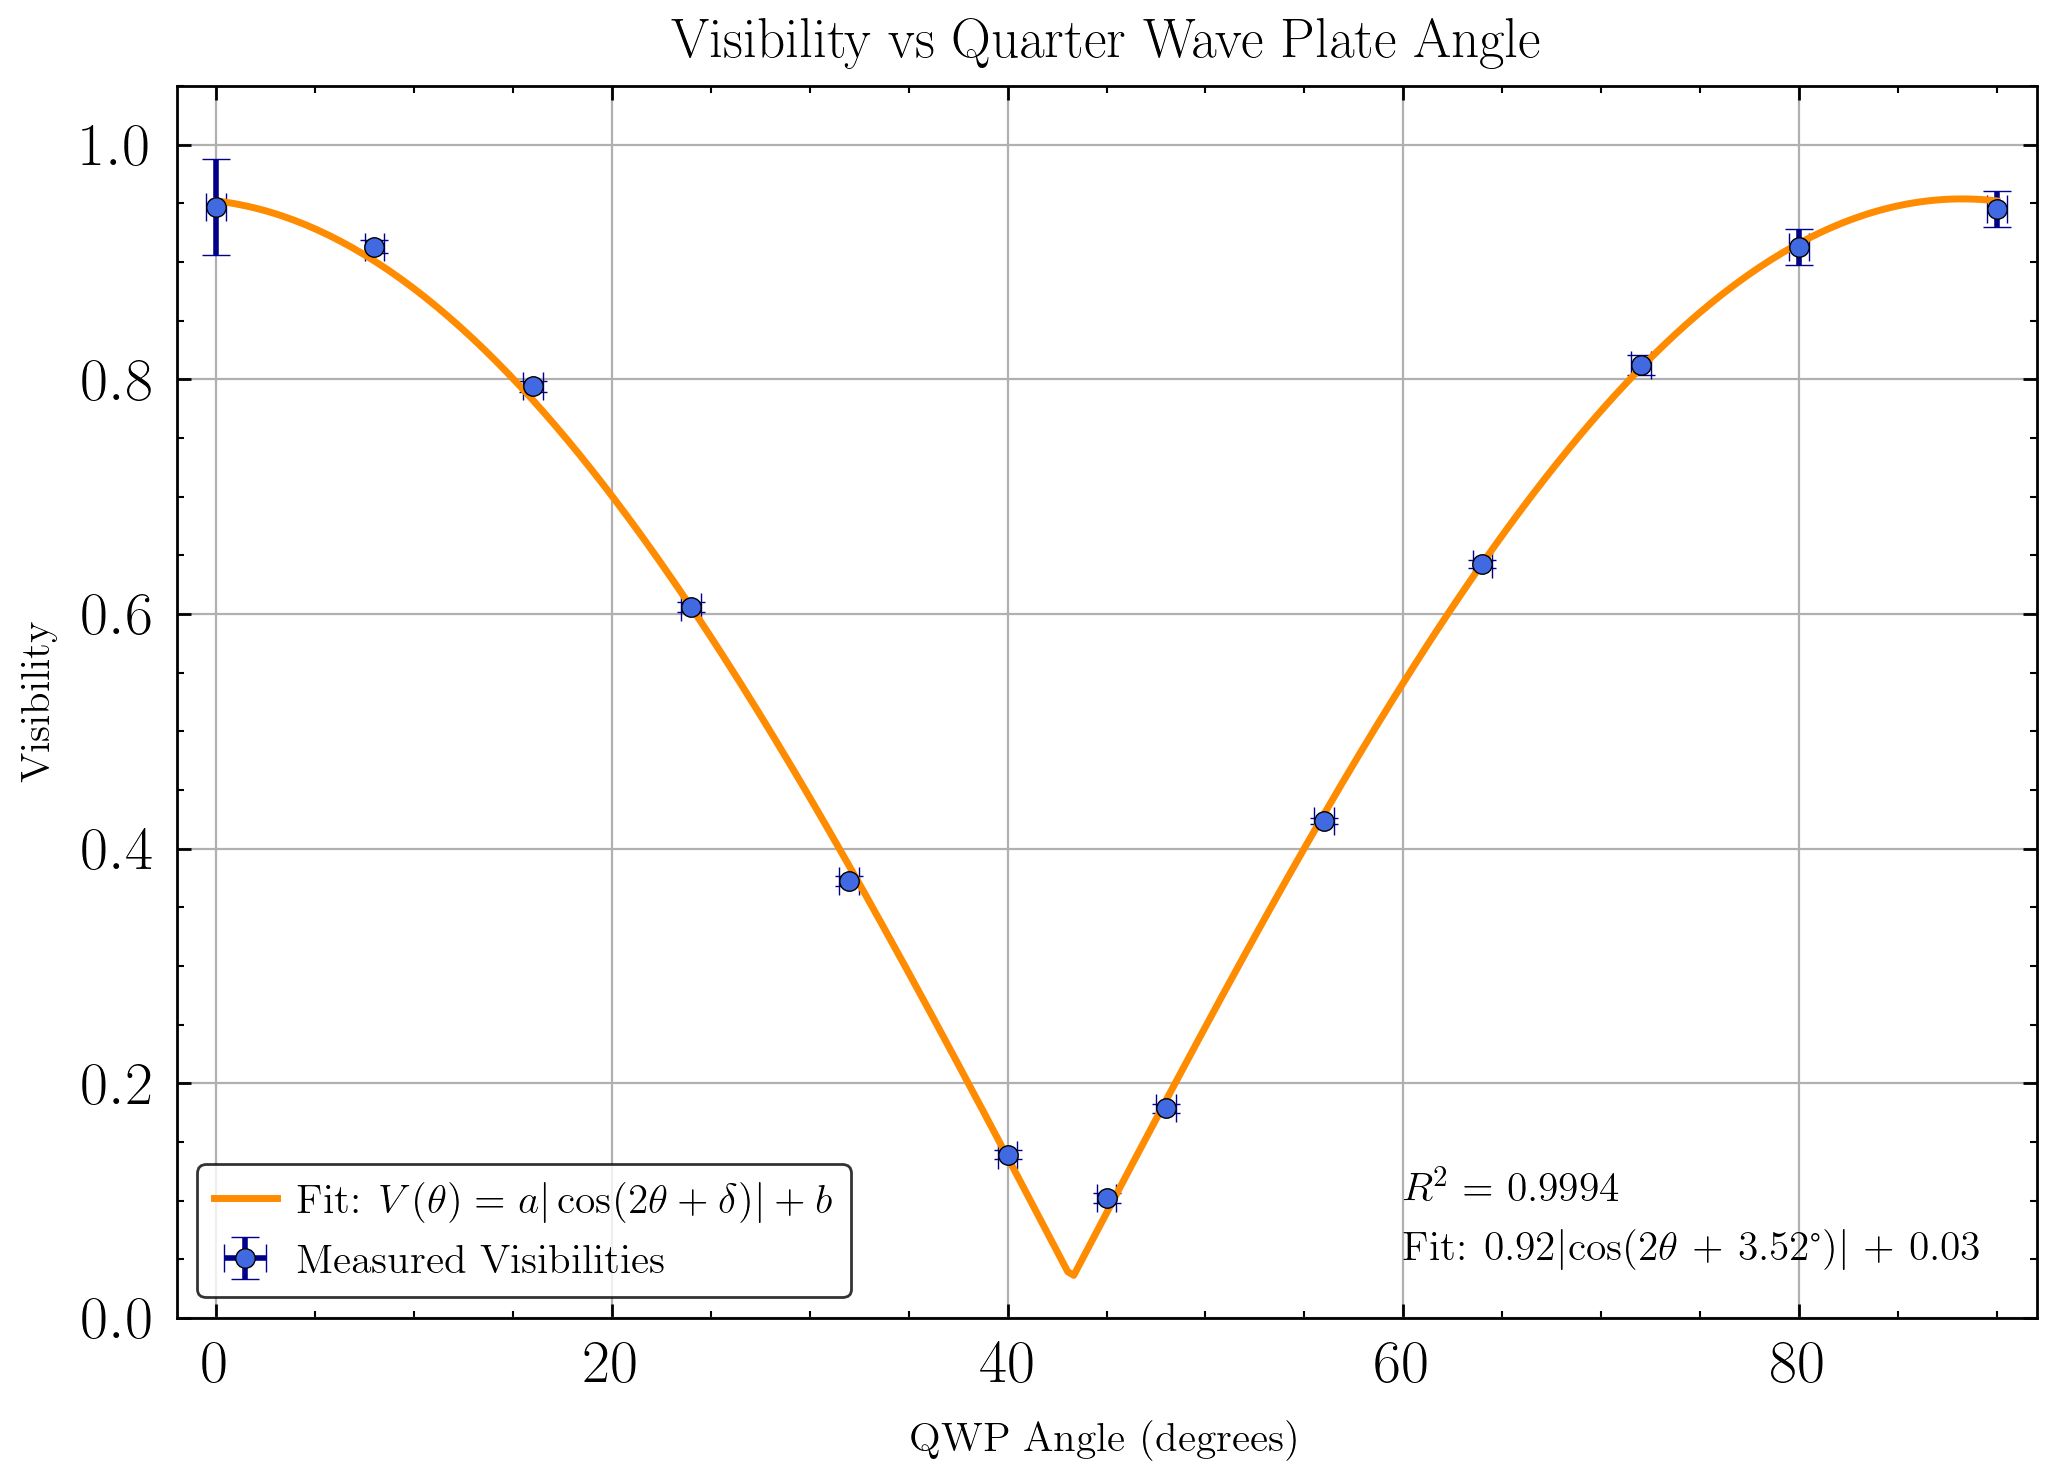

In [6]:


# plt.errorbar(angles, visibilities, yerr=std_visibilities, fmt='o', capsize=5)
    
x_err = 0.5  # degrees
plt.errorbar(angles, visibilities,
                xerr=x_err, 
            yerr=std_visibilities, 
            fmt='o',              # Markers only
            markersize=7,         # Slightly larger markers
            markerfacecolor='royalblue', # A nicer blue
            markeredgecolor='black', # Black edge for clarity
            markeredgewidth=0.5,
            ecolor='darkblue',   # Lighter error bars
            elinewidth=2,         # Thicker error lines
            capsize=5,            # Add caps to error bars
            label='Measured Visibilities')

def curve_analyse(x, a, b, c):
    return a * np.abs(np.cos(np.pi * x / 90 + c)) + b

popt, pcov = curve_fit(curve_analyse, angles, visibilities, p0=[1, 0, np.pi/10], maxfev=10000)
a_fit, b_fit, c_fit = popt

x_fit = np.linspace(0, 90, 300)
y_fit = curve_analyse(x_fit, *popt)

plt.plot(x_fit, y_fit, 
         color='darkorange',    # A darker green
         linewidth=2.5,        # Thicker line
         label=r'Fit: $V(\theta) = a|\cos(2\theta + \delta)| + b$')
plt.xlabel('QWP Angle (degrees)', fontsize=15)
plt.ylabel('Visibility', fontsize=15)
plt.title('Visibility vs Quarter Wave Plate Angle', fontsize=20)

residuals = visibilities - curve_analyse(np.array(angles), *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((visibilities - np.mean(visibilities))**2)
r_squared = 1 - (ss_res / ss_tot)
# plt.text(5, 0.1, f'$R^2$ = {r_squared:.4f}', fontsize=20)
plt.text(60, 0.1, f'$R^2$ = {r_squared:.4f}', fontsize=15)
plt.text(60, 0.05, f'Fit: {a_fit:.2f}$|$cos(2$\\theta$ + {np.rad2deg(c_fit):.2f}°)$|$ + {b_fit:.2f}', fontsize=15)
# delta_deg = np.rad2deg(c_fit) * 2
# plt.text(5, 0.05, f'$\delta$ = {delta_deg:.2f}°', fontsize=20)
plt.grid(True)
plt.title('Visibility vs Quarter Wave Plate Angle', fontsize=20)
plt.xlim(-2, 92)
plt.ylim(-0.0, 1.05)
plt.legend(fontsize=15)
plt.savefig('../plots/classical_no_eraser_visibility_vs_angle.png', dpi=1000)
plt.show()


In [7]:
df = pd.DataFrame({'QWP Angle (degrees)': angles,
                     'Visibility': visibilities,
                     'Visibility Error': std_visibilities, 
                     'Maximum Intensity': max_intensities,
                     'Minimum Intensity': min_intensities, 
                     'Maximum Intensity Error': std_max_intensities,
                        'Minimum Intensity Error': std_min_intensities
                     })
df.to_csv('../data/classical no eraser/classical_no_eraser_visibility_vs_angle.csv', index=False)

<h2><b><u> Data with a quarter wave plate and polarizer (eraser)

In [8]:
visibilities_eraser = []
std_visibilities_eraser = []


In [11]:
angles = [0, 10, 20, 30, 40, 45, 50, 60, 70, 80, 90]
visibilities = []
std_visibilities = []
max_intensities = []
min_intensities = []
std_max_intensities = []
std_min_intensities = []
for angle in angles:
    print(f'Reanalyzing angle {angle} degrees with eraser')
    
    vis = VisibilityCalculation(f'../data/classical eraser/New Data/{angle}degrees.csv', distance = 42, prominence=1e-6)
    # vis.run_diagnostic_plot()
    visibilities.append(vis.get_visibility()[0])
    std_visibilities.append(vis.get_visibility()[1])
    max_intensities.append(np.mean(vis.maxs))
    min_intensities.append(np.mean(vis.mins))
    std_max_intensities.append(np.std(vis.maxs, ddof =1))
    std_min_intensities.append(np.std(vis.mins, ddof =1))
    print(f'Angle: {angle}, Visibility: {vis.get_visibility()}')

Reanalyzing angle 0 degrees with eraser
Angle: 0, Visibility: (nan, np.float64(nan))
Reanalyzing angle 10 degrees with eraser
Angle: 10, Visibility: (np.float64(0.41979592073693994), np.float64(0.006712303856096449))
Reanalyzing angle 20 degrees with eraser
Angle: 20, Visibility: (np.float64(0.6945939086294417), np.float64(0.0041836480728745075))
Reanalyzing angle 30 degrees with eraser
Angle: 30, Visibility: (np.float64(0.8773010537235001), np.float64(0.005871380069501206))
Reanalyzing angle 40 degrees with eraser
Angle: 40, Visibility: (np.float64(0.9663727200839068), np.float64(0.005616881668251725))
Reanalyzing angle 45 degrees with eraser
Angle: 45, Visibility: (np.float64(0.953905865097218), np.float64(0.0067383878662059865))
Reanalyzing angle 50 degrees with eraser
Angle: 50, Visibility: (np.float64(0.9165304955121708), np.float64(0.010110833275030132))
Reanalyzing angle 60 degrees with eraser
Angle: 60, Visibility: (np.float64(0.7301997877802616), np.float64(0.00681644392447928

<ErrorbarContainer object of 3 artists>

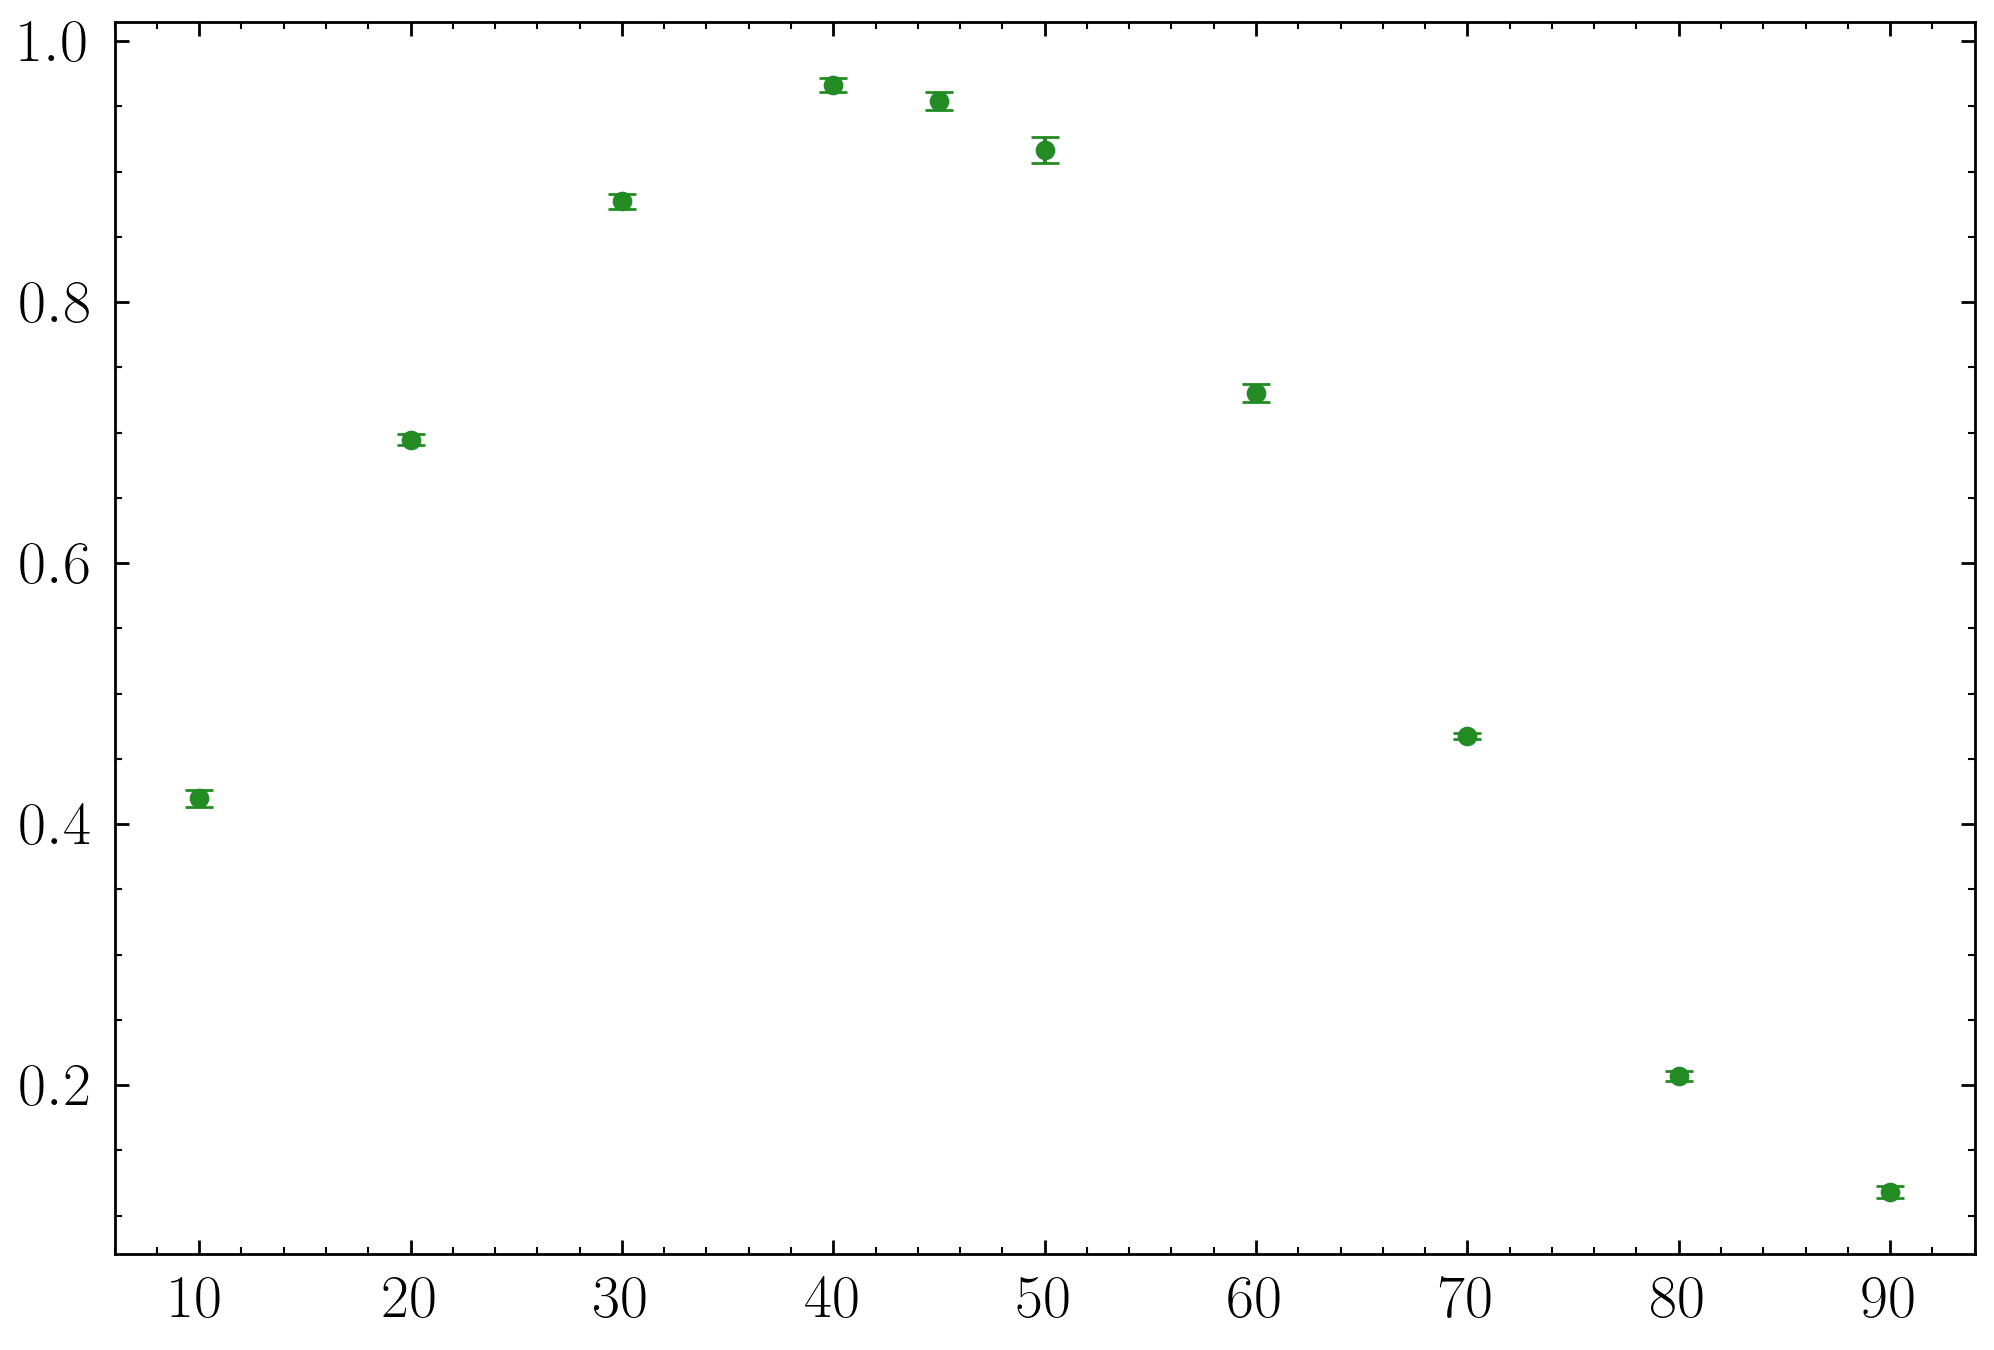

In [12]:
plt.plot(angles, visibilities, 'o', label='With Quantum Eraser')
plt.errorbar(angles, visibilities, yerr=std_visibilities, fmt='o', capsize=5)

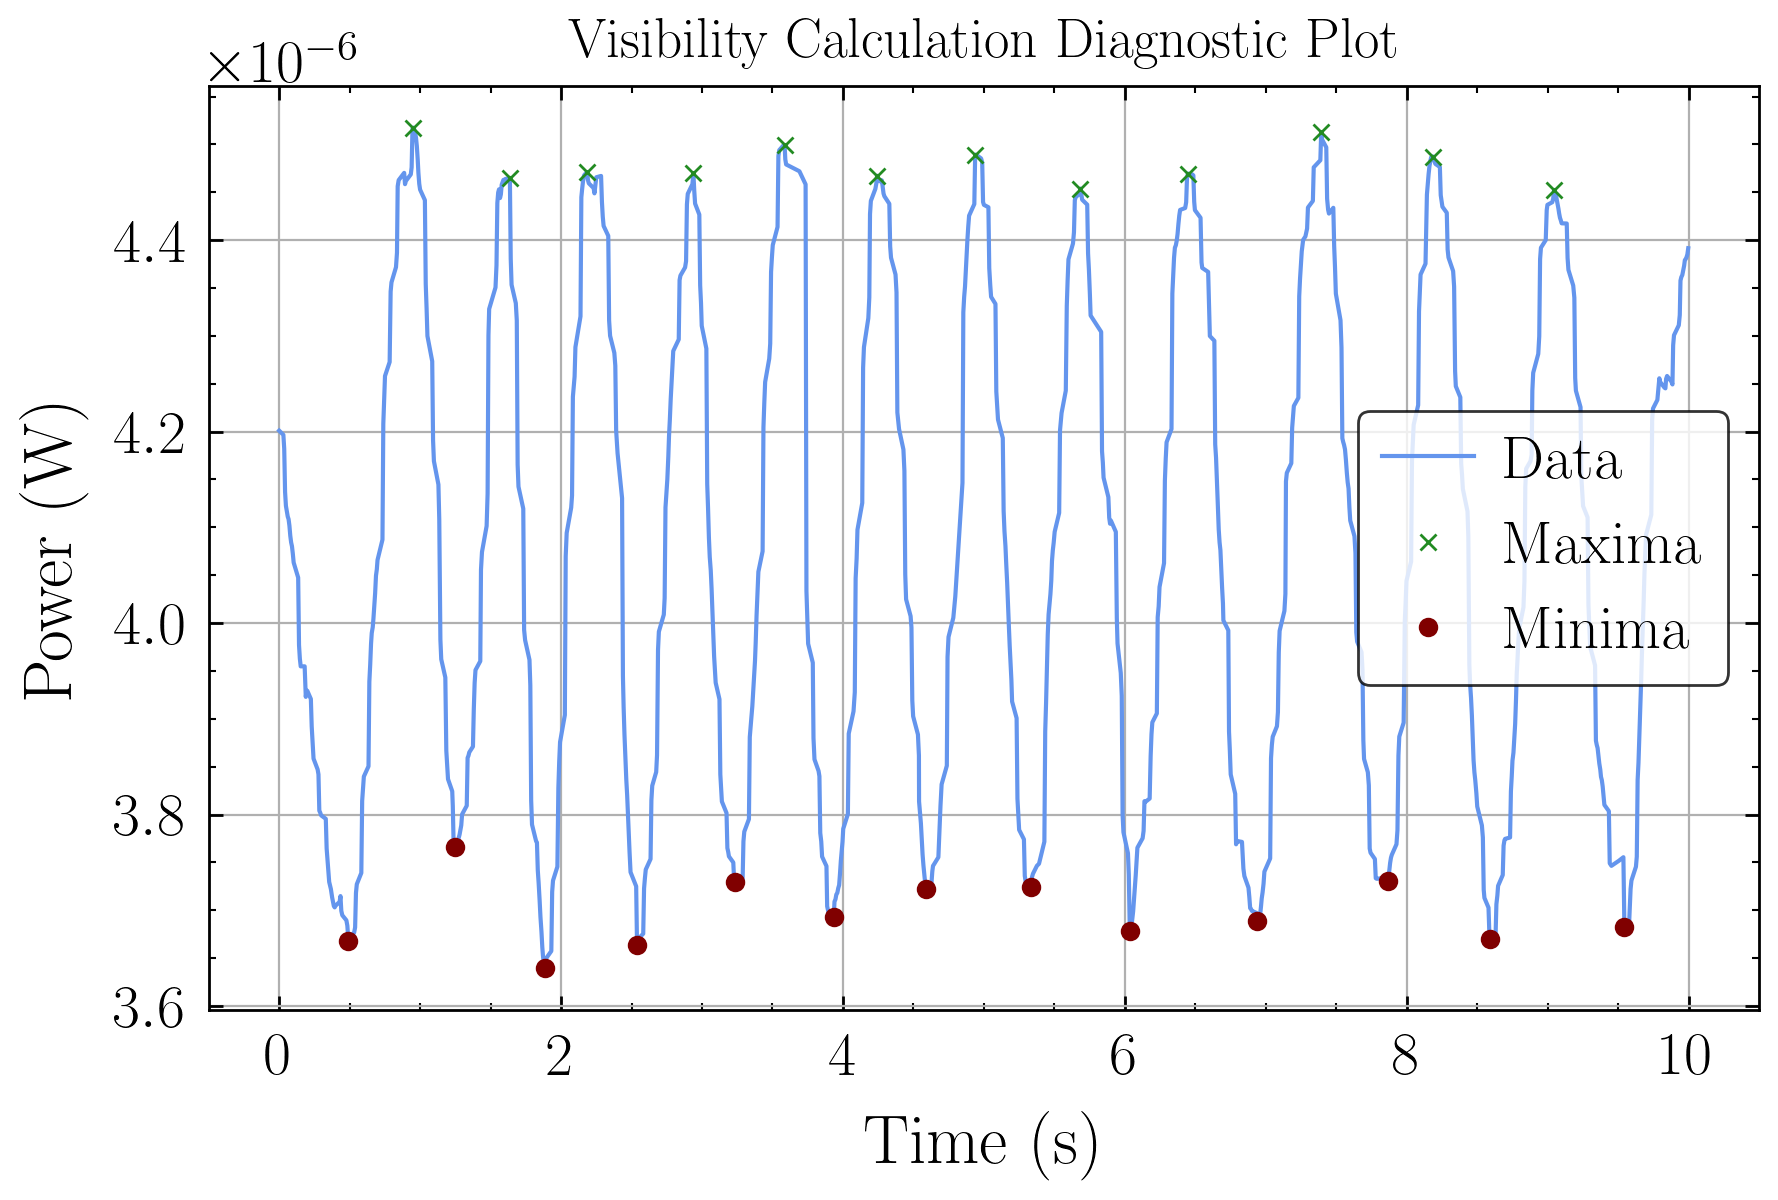

In [16]:
vis = VisibilityCalculation(f'../data/classical eraser/New Data/0degrees.csv', distance = 42, prominence=0.5e-6)
visibilities[0] = vis.get_visibility()[0]
std_visibilities[0] = vis.get_visibility()[1]
vis.run_diagnostic_plot()
vis.get_visibility()
max_intensities[0] = np.mean(vis.maxs)
min_intensities[0] = np.mean(vis.mins)
std_max_intensities[0] = np.std(vis.maxs, ddof=1)
std_min_intensities[0] = np.std(vis.mins, ddof=1)

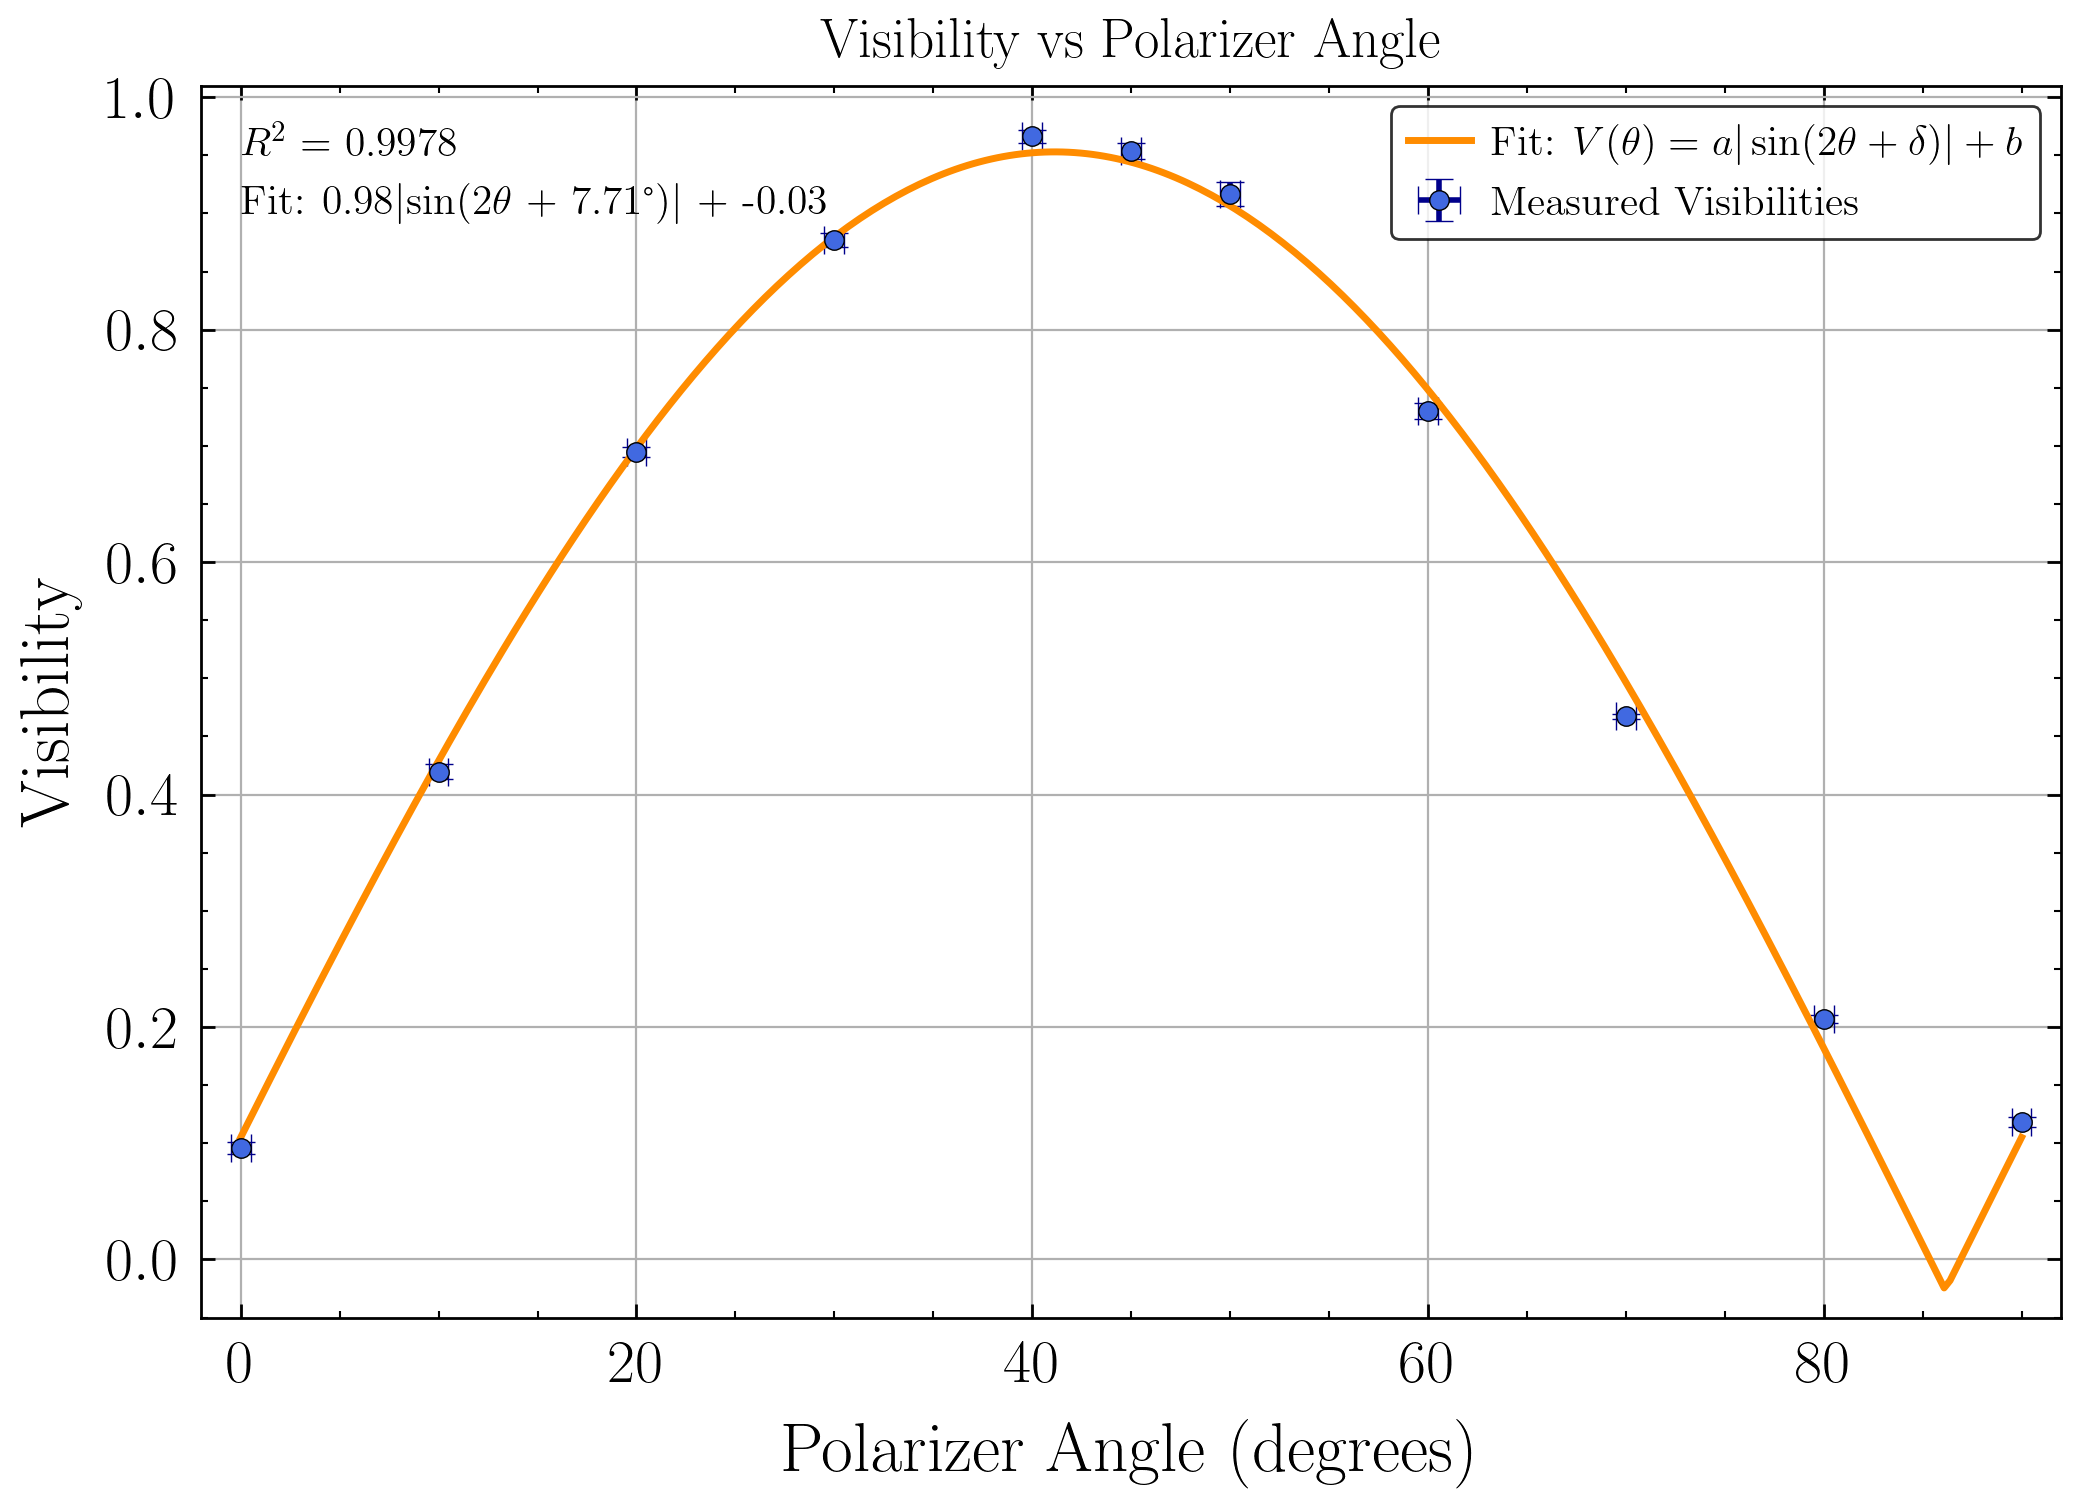

In [17]:
x_err = 0.5  # degrees
plt.errorbar(angles, visibilities,
                xerr=x_err, 
            yerr=std_visibilities, 
            fmt='o',              # Markers only
            markersize=7,         # Slightly larger markers
            markerfacecolor='royalblue', # A nicer blue
            markeredgecolor='black', # Black edge for clarity
            markeredgewidth=0.5,
            ecolor='darkblue',   # Lighter error bars
            elinewidth=2,         # Thicker error lines
            capsize=5,            # Add caps to error bars
            label='Measured Visibilities')

def curve_analyse_eraser(x, a, b, c):
    return a * np.abs(np.sin(np.pi * x / 90 + c)) + b


popt, pcov = curve_fit(curve_analyse_eraser, angles, visibilities, p0=[1, 0, np.pi/10], maxfev=10000)

plt.plot(x_fit, curve_analyse_eraser(x_fit, *popt),
            color='darkorange',    # A darker green
            linewidth=2.5,        # Thicker line
            label=r'Fit: $V(\theta) = a|\sin(2\theta + \delta)| + b$')
a_fit, b_fit, c_fit = popt
plt.xlabel('Polarizer Angle (degrees)')
plt.ylabel('Visibility')
plt.title('Visibility vs Polarizer Angle', fontsize=20)
residuals = visibilities - curve_analyse_eraser(np.array(angles), *popt)    
ss_res = np.sum(residuals**2)
ss_tot = np.sum((visibilities - np.mean(visibilities))**2)
r_squared = 1 - (ss_res / ss_tot)
plt.text(0, 0.95, f'$R^2$ = {r_squared:.4f}', fontsize=15)
plt.text(0, 0.90, f'Fit: {a_fit:.2f}$|$sin(2$\\theta$ + {np.rad2deg(c_fit):.2f}°)$|$ + {b_fit:.2f}', fontsize=15)
plt.xlim(-2, 92)
plt.ylim(-0.05, 1.01)
plt.grid(True)
plt.legend(fontsize=15)
plt.savefig('../plots/classical_with_eraser_visibility_vs_angle.png', dpi=1000)
plt.show()

In [18]:
df = pd.DataFrame({'Polarizer Angle (degrees)': angles,
                        'Visibility': visibilities,
                        'Visibility Error': std_visibilities, 
                        'Maximum Intensity': max_intensities,
                        'Minimum Intensity': min_intensities, 
                        'Maximum Intensity Error': std_max_intensities,
                            'Minimum Intensity Error': std_min_intensities
                        })
df.to_csv('../data/classical eraser/classical_eraser_visibility_vs_polarizer_angle.csv', index=False)